In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import scipy

plt.style.use(['science','ieee'])
plt.rcParams['font.size'] = 13

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from scipy.stats import qmc

rng = np.random.default_rng(12345678)
radius = 0.25
engine = qmc.PoissonDisk(d=2, radius=radius, seed=rng)
sample = engine.random(15)

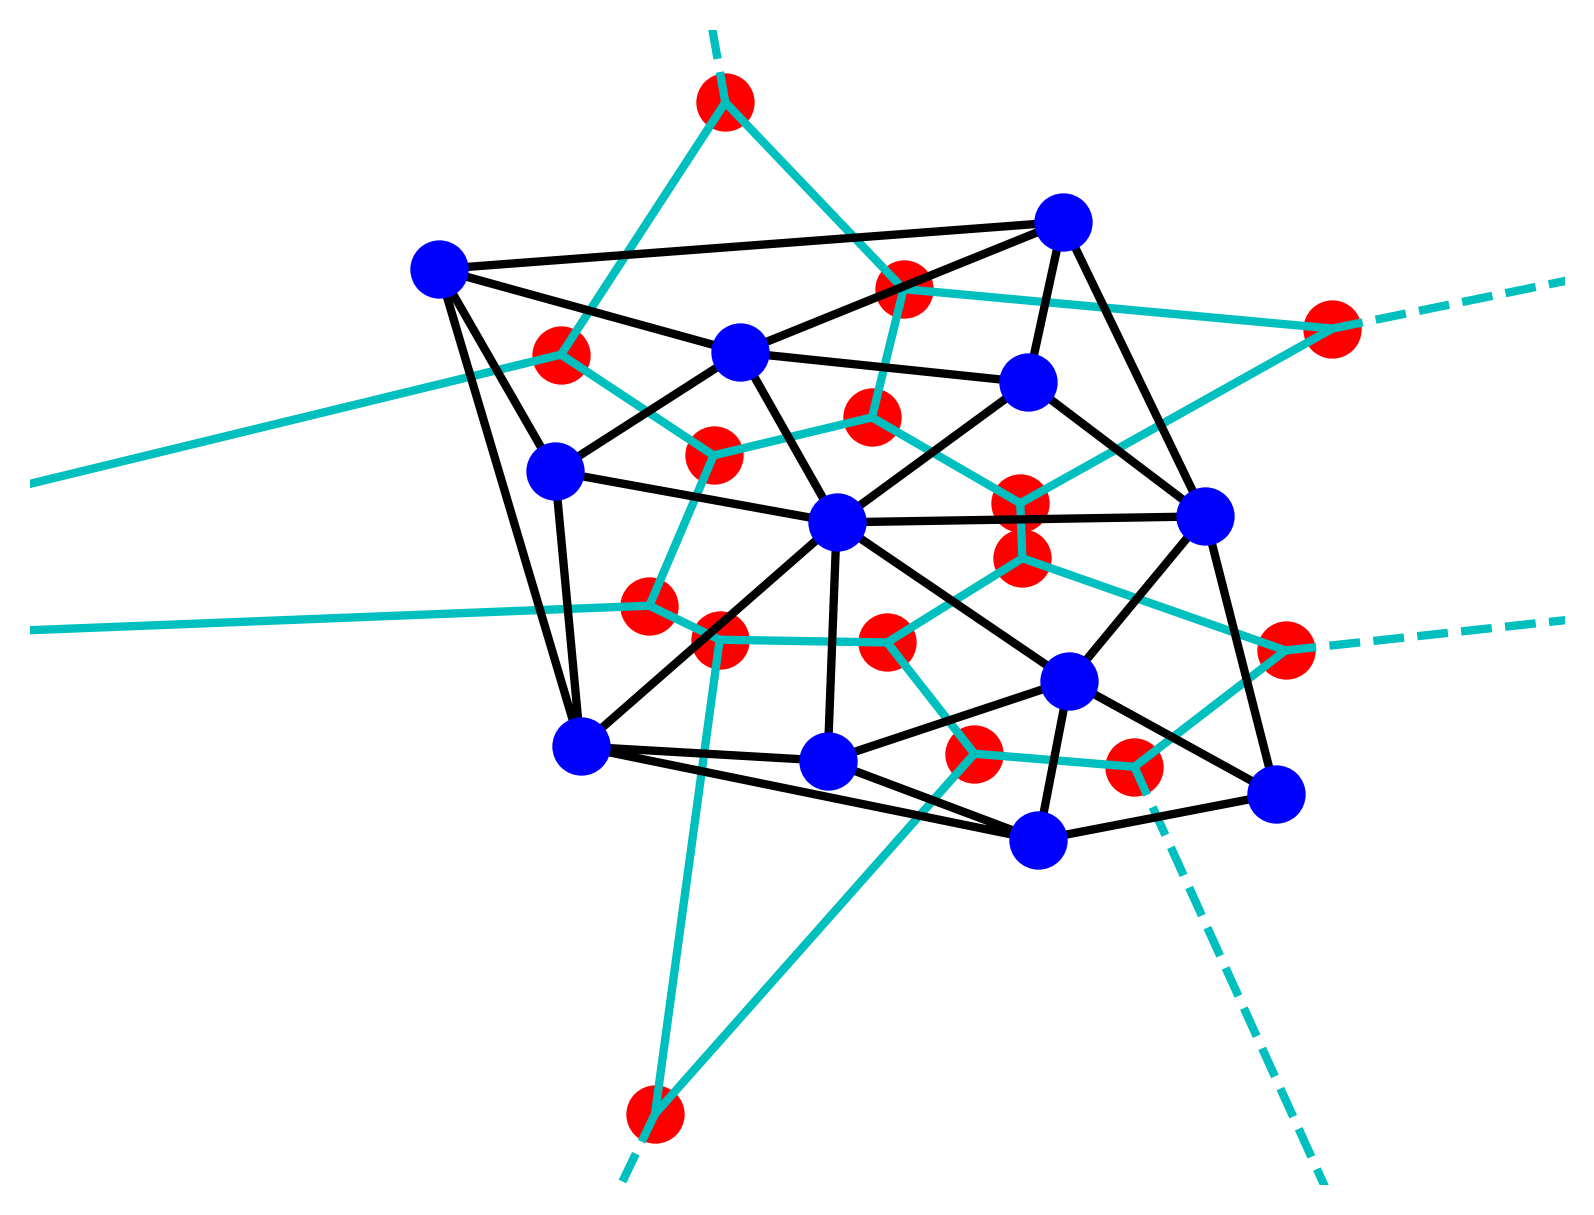

In [4]:
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, ConvexHull, convex_hull_plot_2d

fig, ax = plt.subplots()
vor = Voronoi(sample)
tri = Delaunay(sample)
fig = voronoi_plot_2d(vor, ax=ax, line_colors="c")
ax.triplot(tri.points[:,0], tri.points[:,1], tri.simplices, zorder=10, color='k')
ax.plot(tri.points[:,0], tri.points[:,1], 'bo', label="Initial Points", zorder=11)
ax.set_xlim([-0.3, 1.3])
ax.set_ylim([-0.55, 1.3])
ax.set_axis_off()
plt.savefig("figures/voronoi_delaunay.pdf")


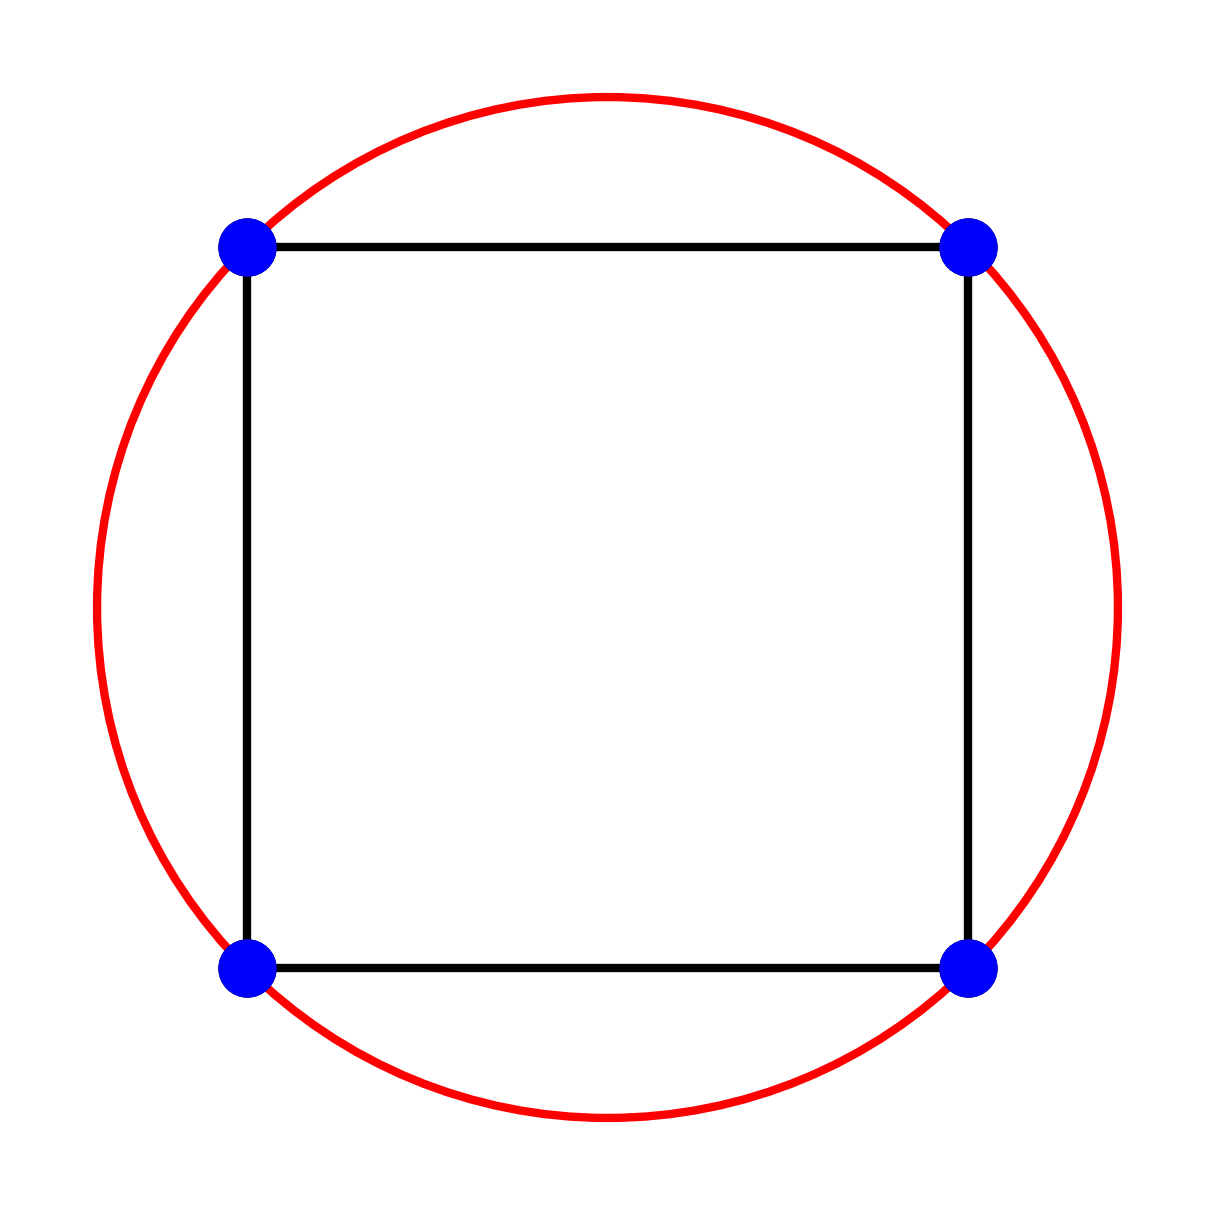

In [5]:
fig, ax = plt.subplots()

points = np.array([[0,0], [0,1], [1,1], [1,0]])
hull = ConvexHull(points)

convex_hull_plot_2d(hull, ax=ax)
ax.plot(points[:,0], points[:,1], 'bo')
circle = plt.Circle((0.5, 0.5), np.sqrt(2*0.5**2), color='r', fill=False)
ax.add_patch(circle)
ax.set_aspect('equal')
ax.set_xlim([-0.3, 1.3])
ax.set_ylim([-0.3, 1.3])
ax.set_axis_off()
plt.savefig("figures/delauny_not_tri.pdf")

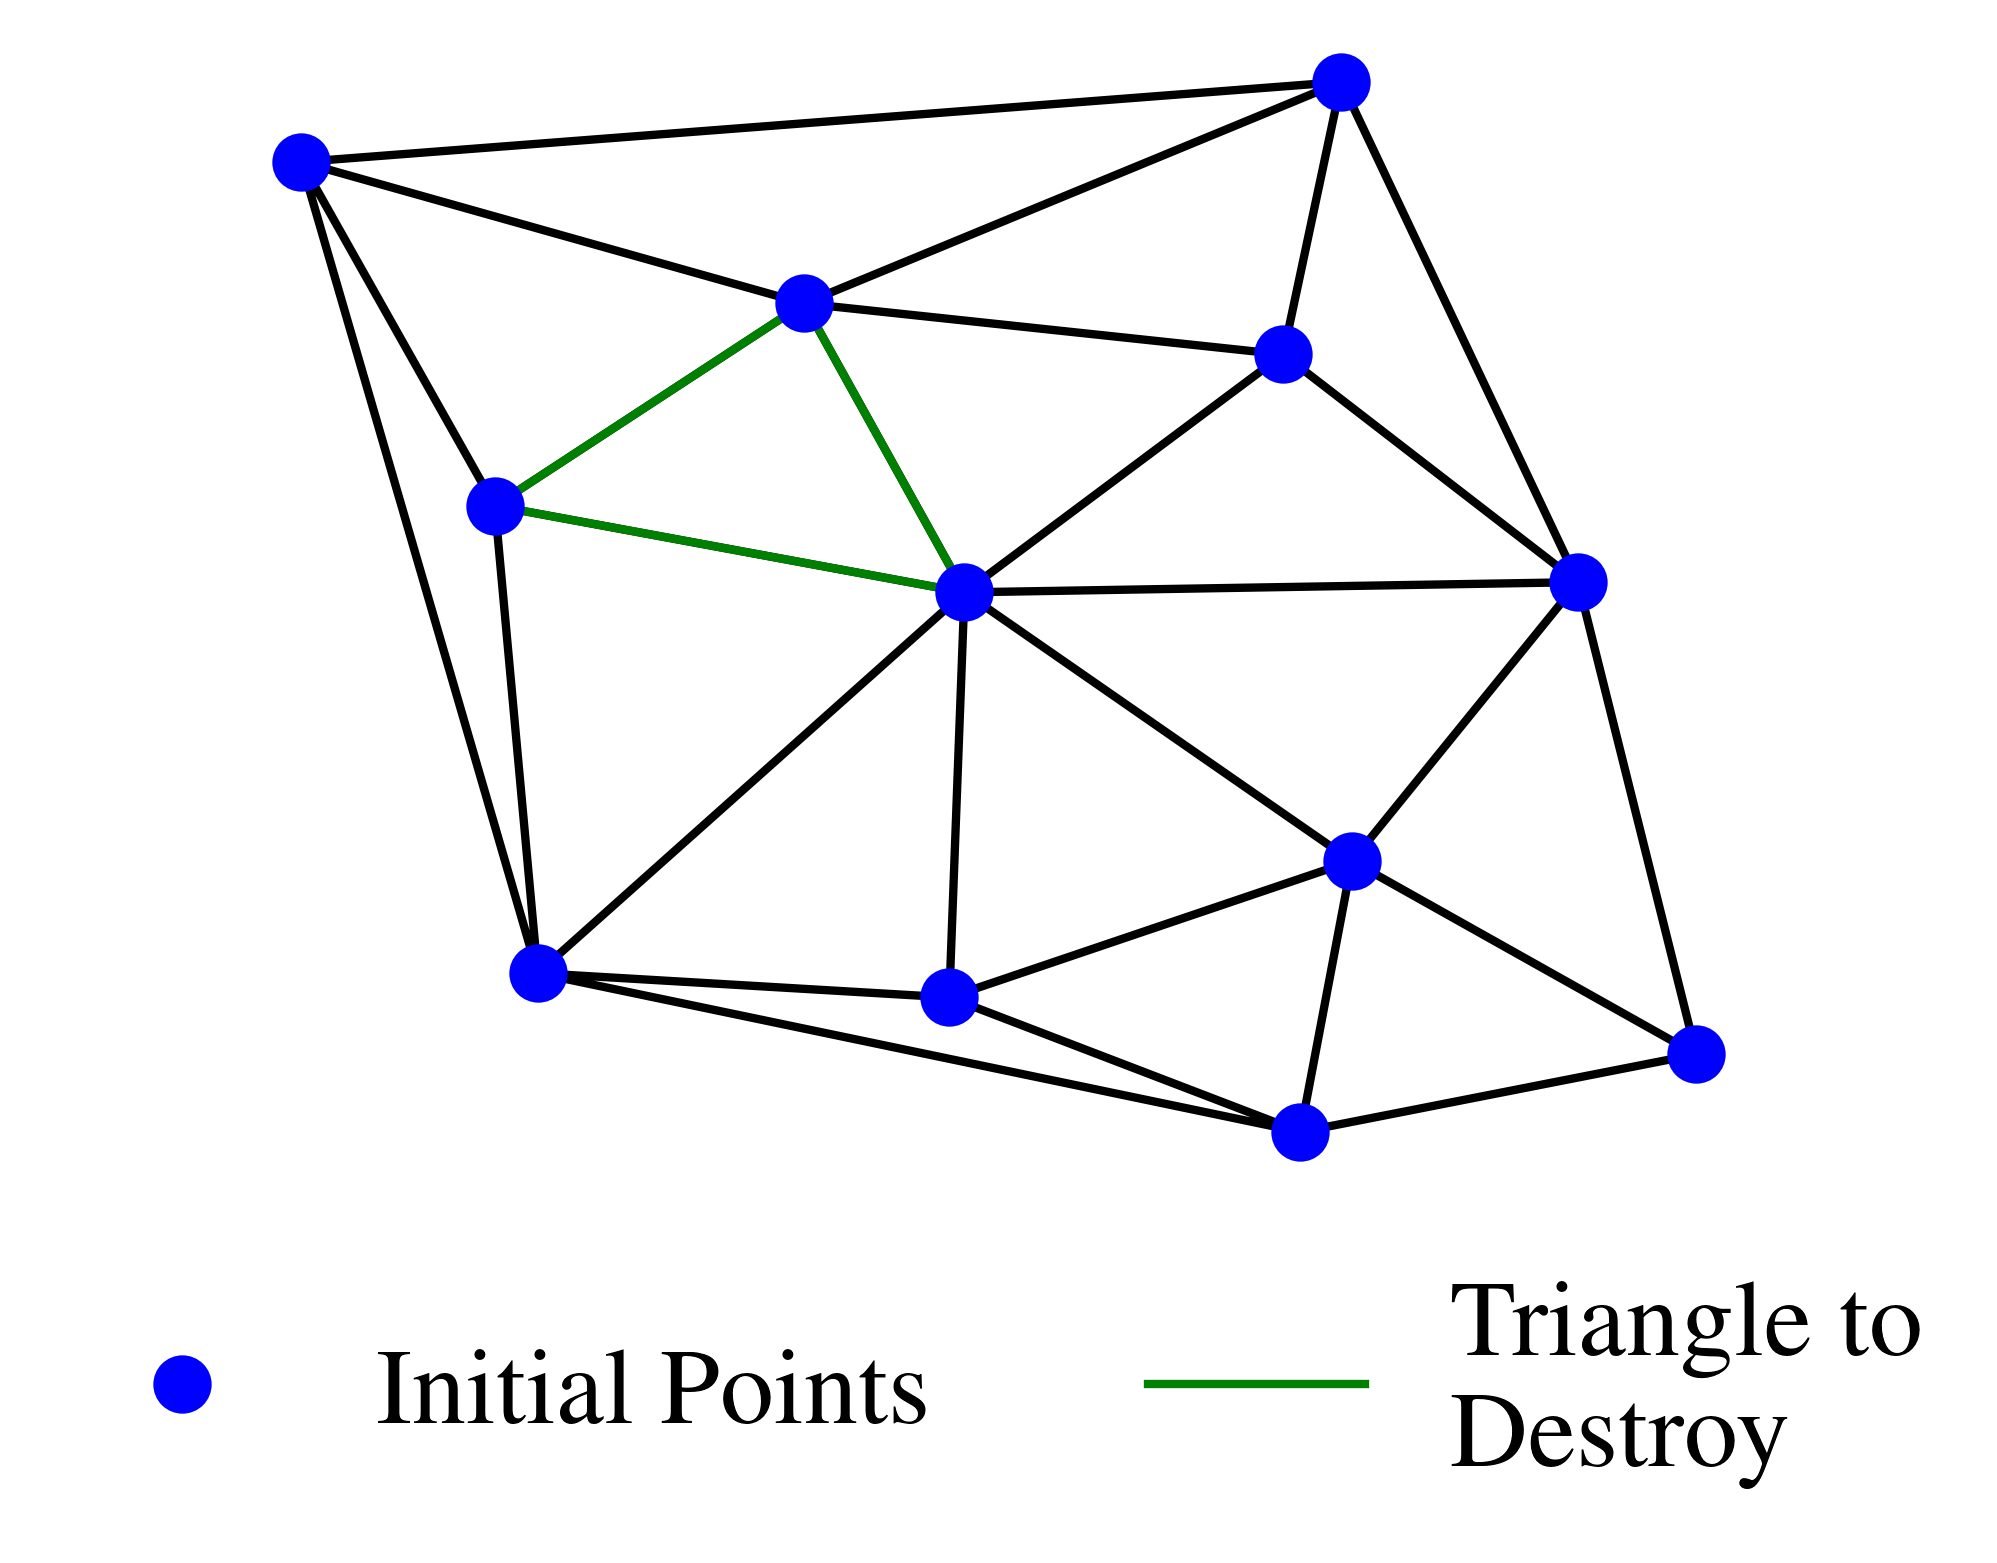

In [9]:
import scipy.spatial
tri = scipy.spatial.Delaunay(sample)
# destruction of a triangle

to_destroy = 7

fig, ax = plt.subplots()
ax.triplot(tri.points[:,0], tri.points[:,1], tri.simplices)
ax.plot(tri.points[:,0], tri.points[:,1], 'o', label="Initial Points")
ax.triplot(tri.points[tri.simplices[to_destroy],0], tri.points[tri.simplices[to_destroy],1], label="Triangle to\nDestroy")
#ax.legend(facecolor='white', framealpha=1, frameon=True)
ax.legend(loc='upper center',bbox_to_anchor=(0.5, 0),
          fancybox=True, shadow=True, ncol=2)
ax.set_axis_off()
plt.savefig("figures/pre_destroy_triangle.pdf")

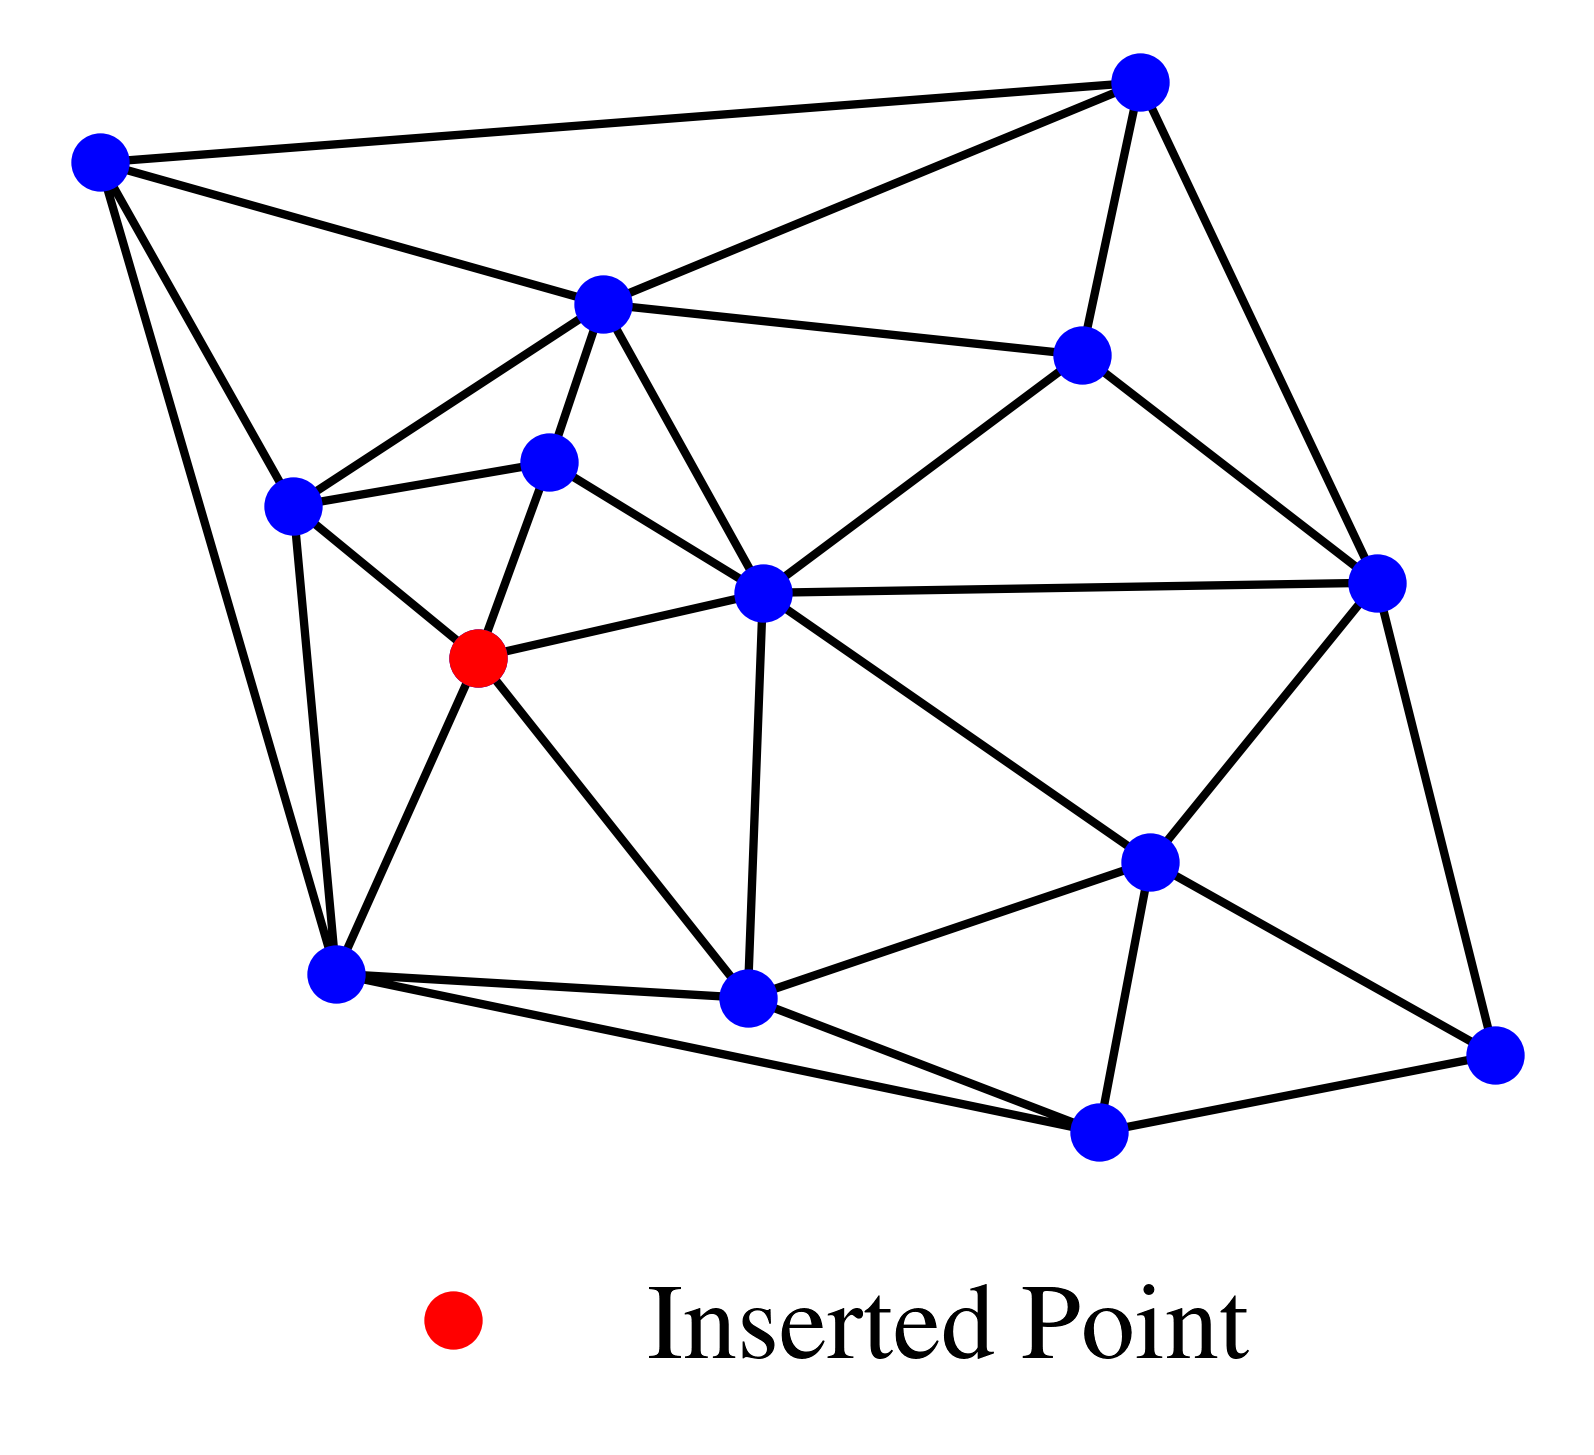

In [11]:
from poles_roots._utils import compute_incenter

A, B, C = tri.points[tri.simplices[to_destroy],:]
point = compute_incenter(A,B,C)

tri = scipy.spatial.Delaunay(np.concatenate([tri.points, point[None, :]]))

fig, ax = plt.subplots()
ax.triplot(tri.points[:,0], tri.points[:,1], tri.simplices)
ax.plot(tri.points[:,0], tri.points[:,1], 'o')
ax.plot(point[0], point[1], 'ro', label="Inserted Point")
#ax.legend(facecolor='white', framealpha=1, frameon=True)
ax.legend(loc='upper center',bbox_to_anchor=(0.5, 0),
          fancybox=True, shadow=True, ncol=1)
ax.set_axis_off()
plt.savefig("figures/post_destroy_triangle.pdf")

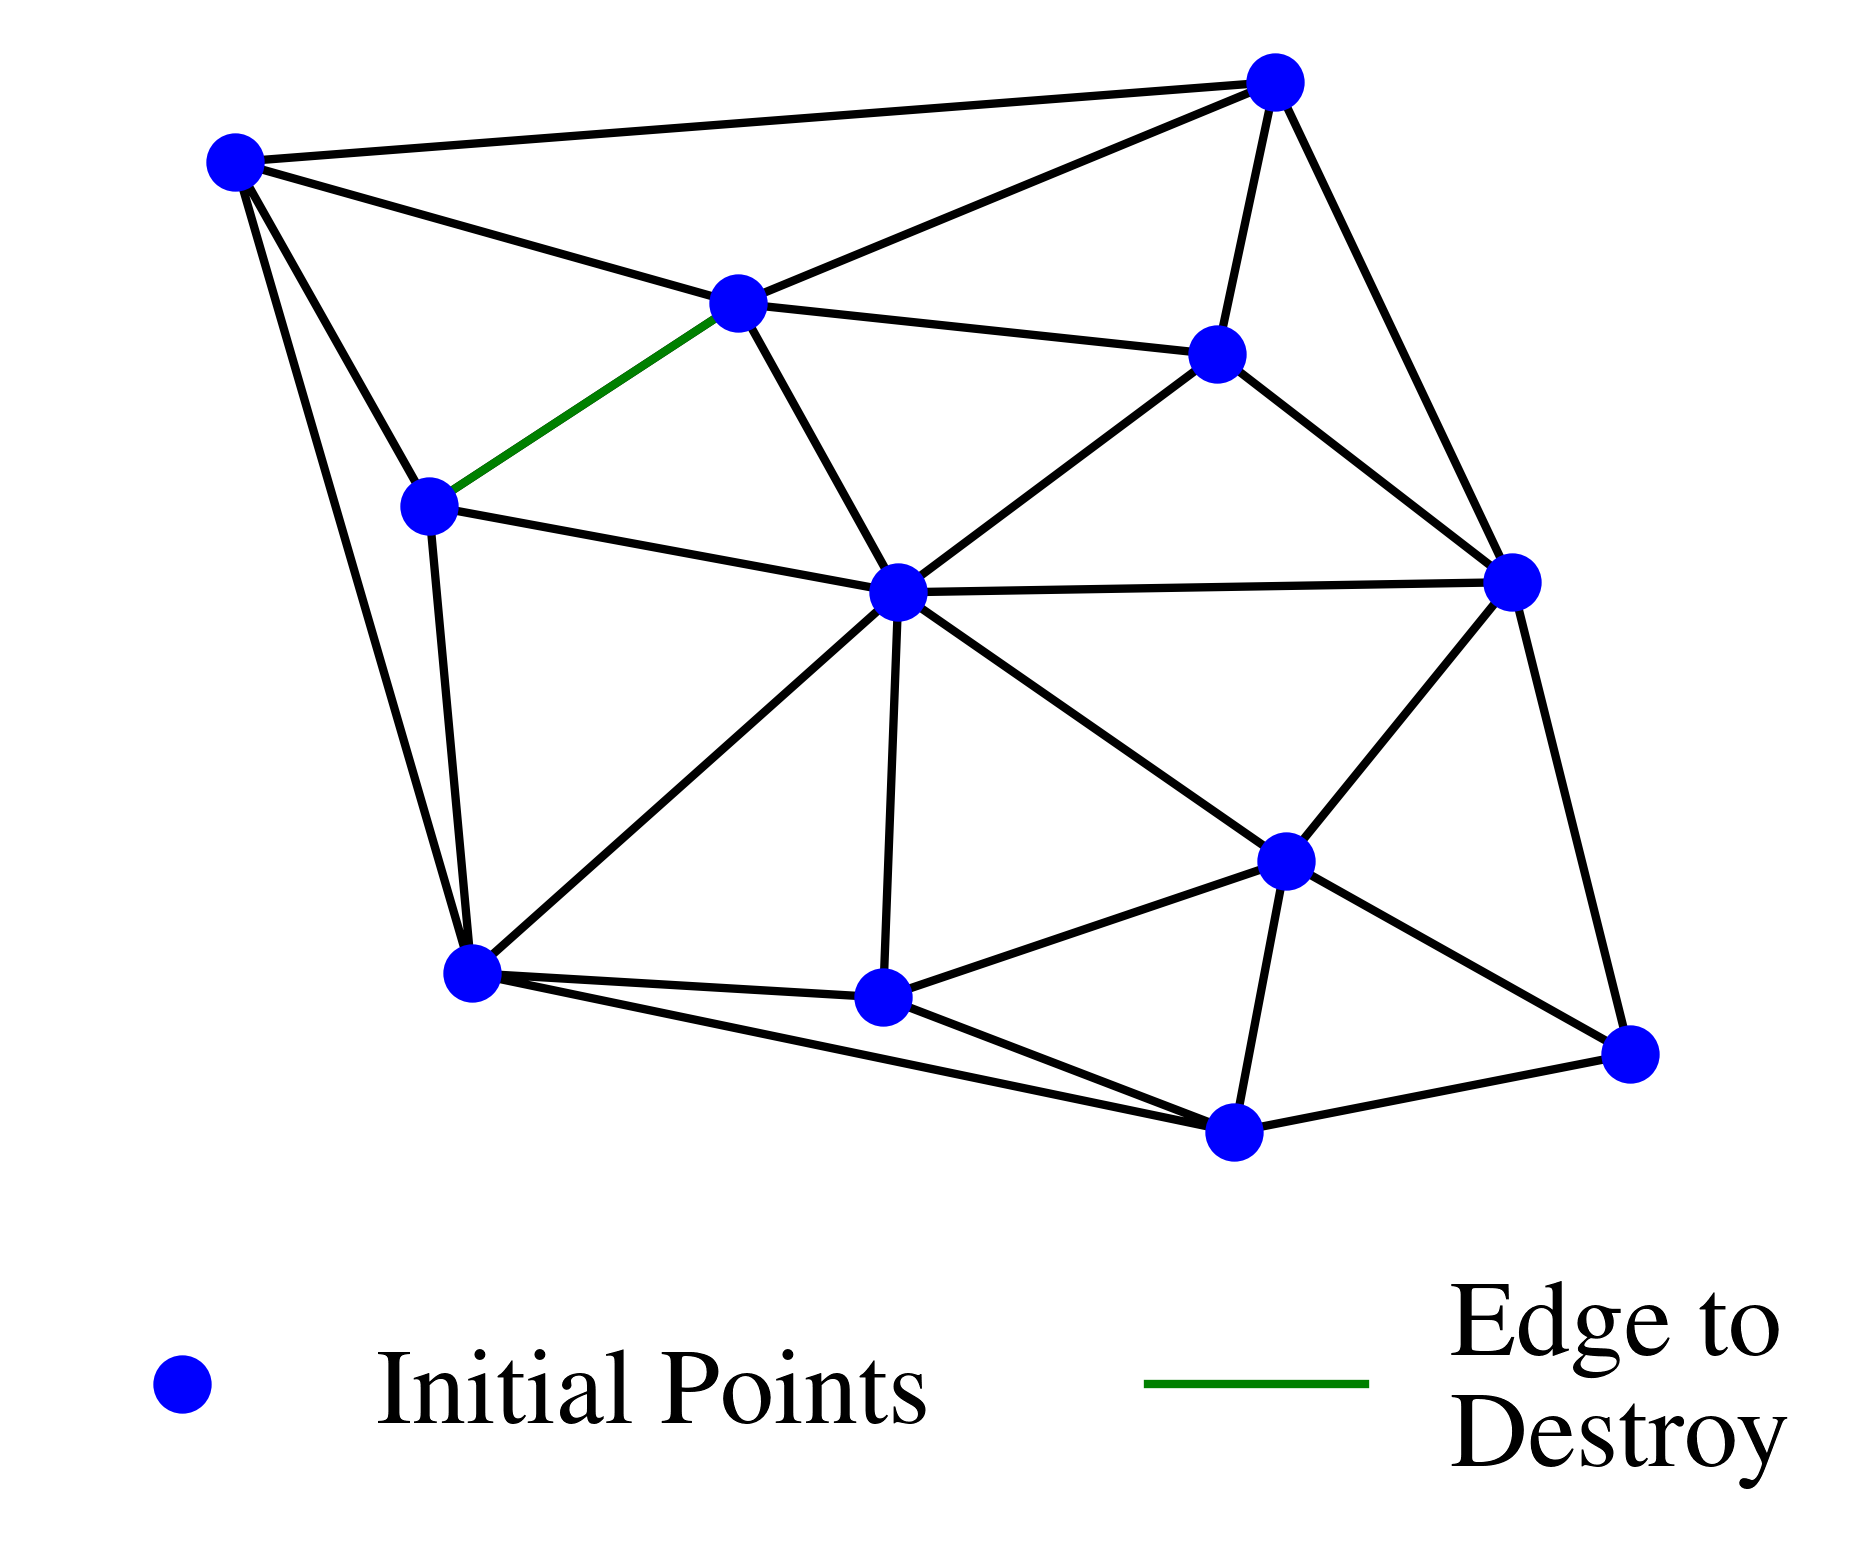

In [12]:
# destruction of edge

tri = scipy.spatial.Delaunay(sample)

edge = tri.points[[1, 5], :]

to_destroy = 7

fig, ax = plt.subplots()
ax.triplot(tri.points[:,0], tri.points[:,1], tri.simplices)
ax.plot(tri.points[:,0], tri.points[:,1], 'o', label="Initial Points", zorder=10)
ax.plot(*edge.T, 'g-', label="Edge to\nDestroy")
ax.legend(loc='upper center',bbox_to_anchor=(0.5, 0),
          fancybox=True, shadow=True, ncol=2)
ax.set_axis_off()
plt.savefig("figures/pre_destroy_edge.pdf")

In [14]:
A, B = edge

center = (A + B) / 2
diff = A - B
radius = np.linalg.norm(A - B) / 2.1
angle = np.arctan2(diff[1], diff[0])

r = radius * np.sqrt(rng.random())
theta = rng.uniform(
    [angle, angle + np.pi], [angle + np.pi, angle + 2 * np.pi]
)
new = center + r*np.array([np.cos(theta), np.sin(theta)])

tri = scipy.spatial.Delaunay(np.concatenate([sample, new]))


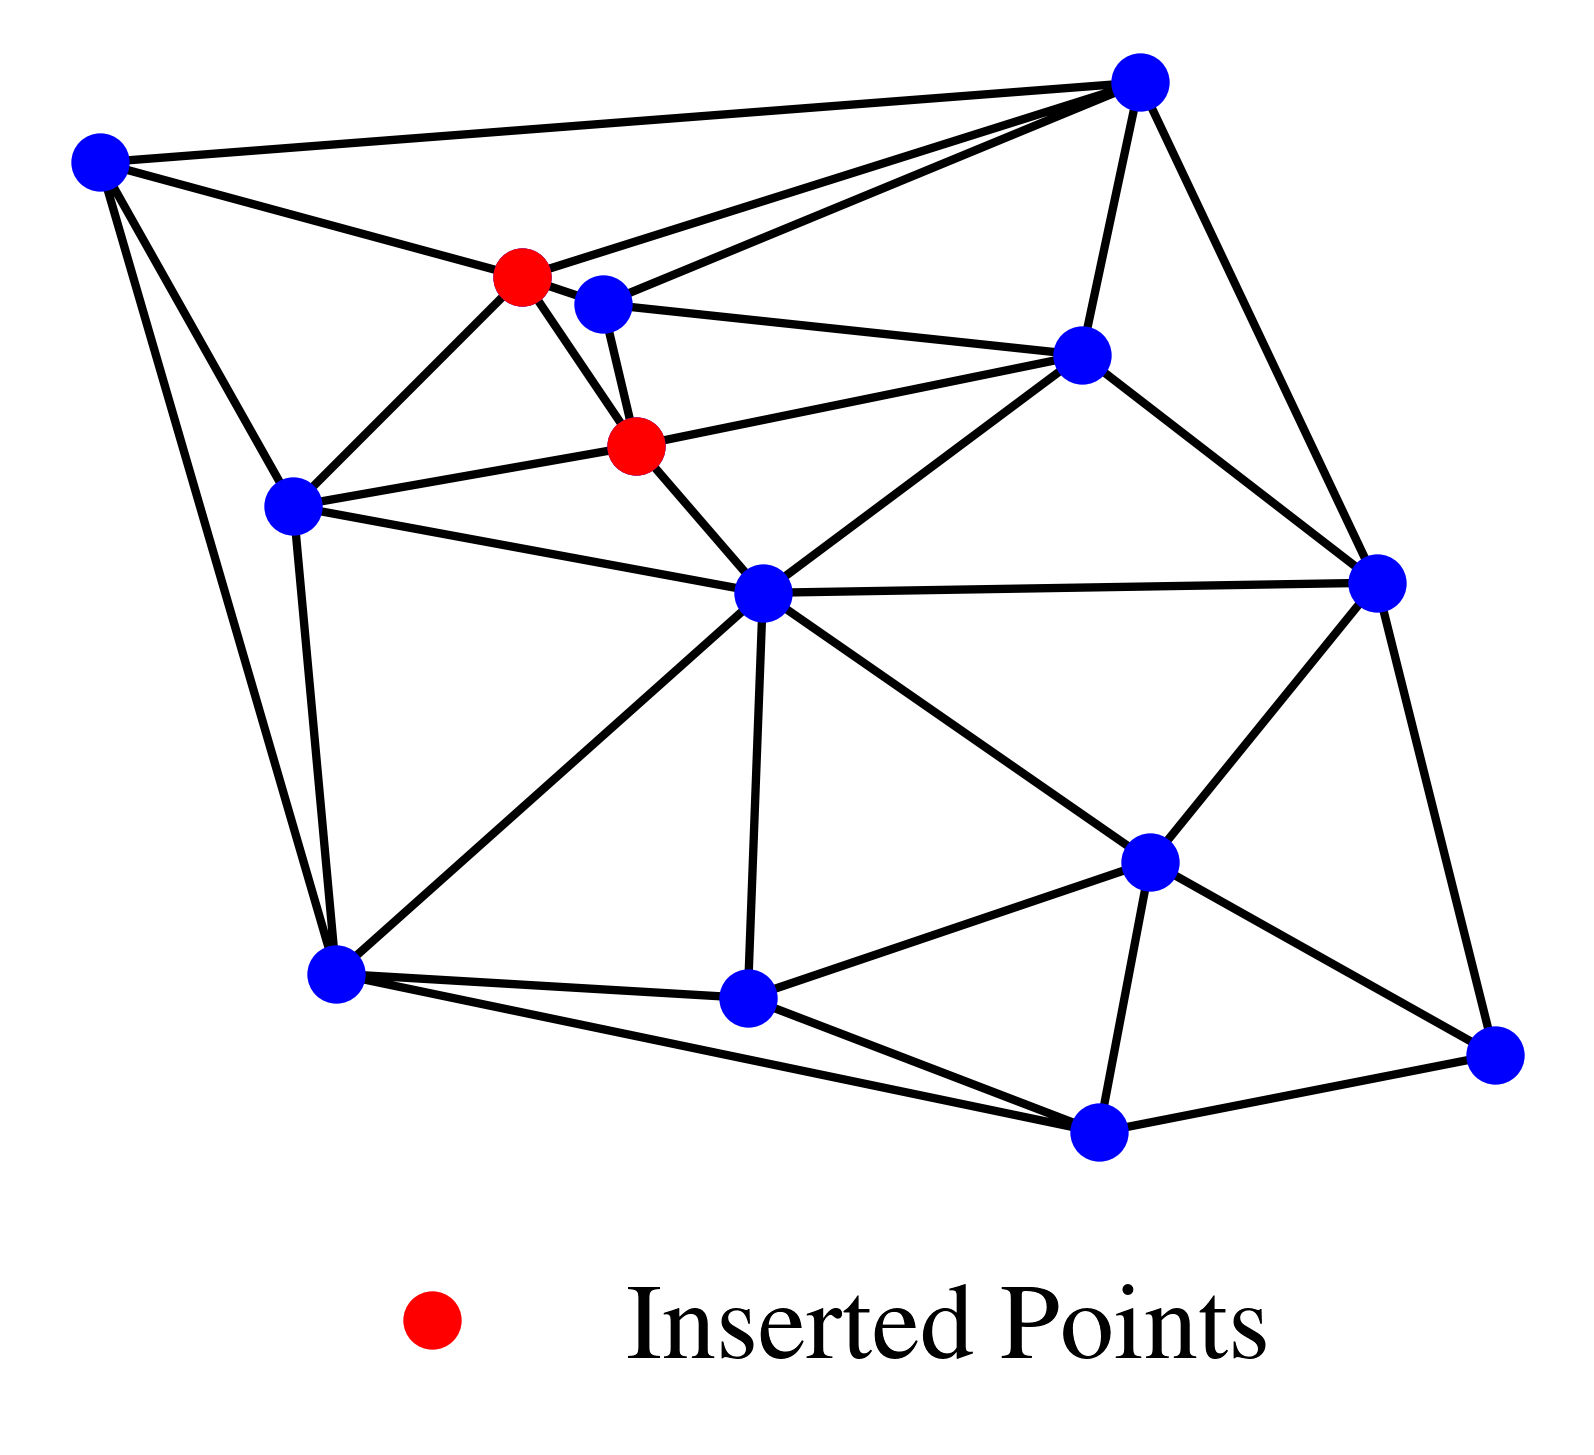

In [15]:
fig, ax = plt.subplots()
ax.triplot(tri.points[:,0], tri.points[:,1], tri.simplices)
ax.plot(tri.points[:,0], tri.points[:,1], 'o')
ax.plot(*new.T, 'ro', label="Inserted Points")
ax.legend(loc='upper center',bbox_to_anchor=(0.5, 0),
          fancybox=True, shadow=True, ncol=2)
ax.set_axis_off()
plt.savefig("figures/post_destroy_edge.pdf")